# 2 Linear regression with one variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from utils import *

%matplotlib inline

In [2]:
data1 = pd.read_csv('../data/ex1data1.txt', header=None)
data1.columns = ['population', 'profit']
data1.head()
# data1.describe()
# data1.dtypes

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the Data

Text(0, 0.5, 'Profit in $10,000s')

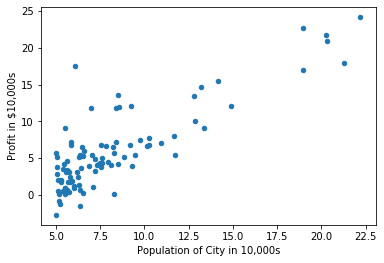

In [3]:
data1.plot(kind='scatter', x='population', y='profit')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

## 2.2 Gradient Descent

### 2.2.3 Computing the cost J(θ)

In [4]:
X,y = get_data(data1)
init_theta = np.zeros([2,1])
compute_cost(X, y, init_theta)

32.072733877455676

### 2.2.4 Gradient descent

In [5]:
alpha = 0.01
iterations = 1500

best_theta, J = gradient_descent(X, y, init_theta, alpha, iterations)

In [12]:
predict1 = np.array([1, 3.5]).dot(best_theta)
predict2 = np.array([1, 7]).dot(best_theta)
print("A city with population of 35,000 has predicted profit of %.2f$" % (predict1*10000))
print("A city with population of 70,000 has predicted profit of %.2f$" % (predict2*10000))

A city with population of 35,000 has predicted profit of 4519.77$
A city with population of 70,000 has predicted profit of 45342.45$


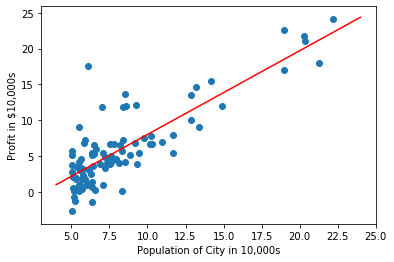

In [7]:
x_range = np.linspace(4,24)
pred = best_theta[0] + best_theta[1] * x_range

plt.figure()
plt.plot(x_range, pred, c='r')
plt.scatter(x='population', y='profit', data=data1)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# 2.4 Visualizing J(θ)

In [8]:
X,y = get_data(data1)

T0 = np.linspace(-10, 10, 500)
T1 = np.linspace(-1, 4, 500)

J = np.zeros([len(T0), len(T1)])

for i, t0 in enumerate(T0):
    for j, t1 in enumerate(T1):
        theta = np.array([[t0],
                          [t1]])
        J[j,i] = compute_cost(X, y, theta)

meshT0,meshT1  = np.meshgrid(T0,T1)

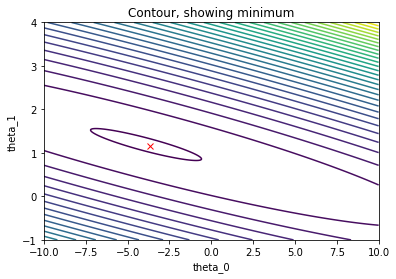

In [9]:
%matplotlib inline

fig, ax = plt.subplots()
CS = ax.contour(meshT0, meshT1, J, np.linspace(J.min()+1, J.max()-1, 30))
ax.set_title('Contour, showing minimum')
plt.plot(best_theta[0], best_theta[1], 'rx')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

<IPython.core.display.Javascript object>


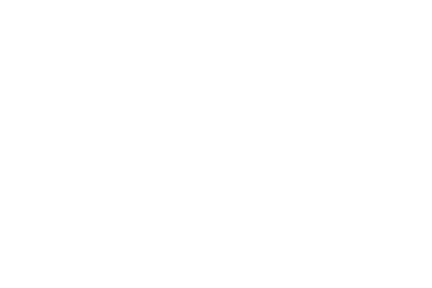

<IPython.core.display.Javascript object>


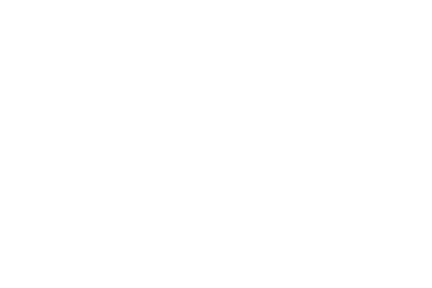

In [10]:
%matplotlib notebook

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(meshT0, meshT1, J, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.title('Surface')
plt.show()